# WISCONSIN BREAST CANCER ORIGINAL

In [1]:
# Import packages needed (arrangement matters)
# Had to revisit multiple times to import apt packages - trial and error.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn. svm import SVC #support vector classifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline 


##### Data was obtained from UCSI. The classification of Breast Cancer is found in the 'Class' variable.
##### A quick look at the dataset shows that :-
##### 1) There are some '?' which are missing values.
##### 2) There are no headers.
##### 3) All values are discrete (1-10) and the class is divided to 2: Benign and 4: Malignant.
##### 4) There are 11 variables and 669 row.

In [2]:
#Upload dataset on pandas 
WBC = pd.read_csv('/Users/pryangkarao/Desktop/Wisconsin Breast Cancer Python/breast-cancer-wisconsin.data', header=None, na_values="?")

#We ensure that the header is set as None and all missing values '?' were converted to NaN.

##### Lets confirm our initial dataset review.


In [3]:
#Check on header status
WBC.head(26)

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4
6,1018099,1,1,1,1,2,10.0,3,1,1,2
7,1018561,2,1,2,1,2,1.0,3,1,1,2
8,1033078,2,1,1,1,2,1.0,1,1,5,2
9,1033078,4,2,1,1,2,1.0,2,1,1,2


In [4]:
#Check the dimensions of the data.
WBC.shape

(699, 11)

##### As expected, we can see :-
##### 1) There are 11 variables.
##### 2) There are NaN values.
##### 3) The values are discrete with the EXCEPTION of variable 7  which is a float because of the NaN.
##### 4) The 'Class' is divided by 2: Benign and 4: Malignant.
##### 5) There are 699 rows.

In [5]:
#Add header to the dataset
WBC.columns = ['ID', 'Clump Thickness', 'Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']

In [6]:
WBC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    683 non-null float64
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: float64(1), int64(10)
memory usage: 60.1 KB


In [7]:
#Determine where the missing values based on variables
WBC.isnull().sum()

ID                              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [8]:
#Drop all missing values
WBC = WBC.dropna()

In [9]:
#Confirm all missing values were dropped.
WBC.isnull().sum()

ID                             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [10]:
#Drop the ID variable as there is there is no significance
WBC = WBC.drop(['ID'], axis=1)

In [11]:
#Check on new dimensions of the dataset
WBC.shape

(683, 10)

In [12]:
# That we removed all missing values, we can allocate 'Bare Nuclei' as an integers instead of float.
WBC['Bare Nuclei'] = WBC['Bare Nuclei'].astype('int')
WBC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
Clump Thickness                683 non-null int64
Uniformity of Cell Size        683 non-null int64
Uniformity of Cell Shape       683 non-null int64
Marginal Adhesion              683 non-null int64
Single Epithelial Cell Size    683 non-null int64
Bare Nuclei                    683 non-null int64
Bland Chromatin                683 non-null int64
Normal Nucleoli                683 non-null int64
Mitoses                        683 non-null int64
Class                          683 non-null int64
dtypes: int64(10)
memory usage: 58.7 KB


In [13]:
#Separating the 'Class' data. 2 is relabelled as 0 and 4 as 2. Thus 0: Benign, 1: Malignant.
label_class = LabelEncoder()
WBC['Class'] = label_class.fit_transform(WBC['Class'])

In [14]:
#Determine the breakdown of the 'Class' to see the number of Benign and Malignant cancer cells
WBC['Class'].value_counts()

0    444
1    239
Name: Class, dtype: int64

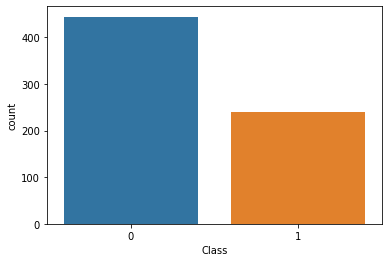

In [15]:
#For easier visual, plot a graph of the 'Class' values
sns.countplot(WBC['Class'])

In [16]:
# Describe the dataset.
WBC.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,0.349927
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.477296
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


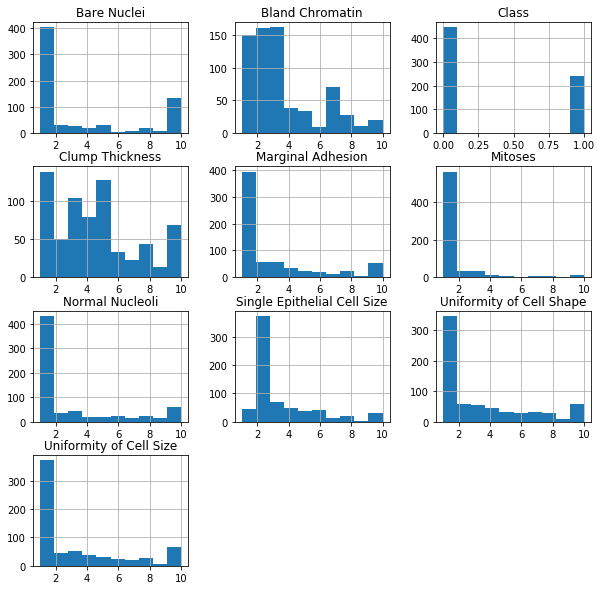

In [17]:
#Histogram visuals of all the variables of the dataset.
hist = WBC.hist(figsize = (10,10))

##### Looking into the boxplots of each variable to see how the values are spread out.

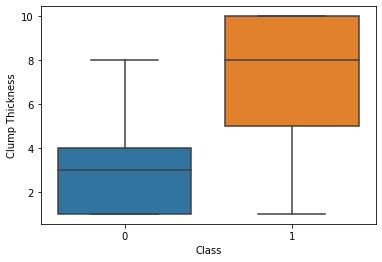

In [18]:
sns.boxplot(x ='Class', y = 'Clump Thickness', data = WBC)

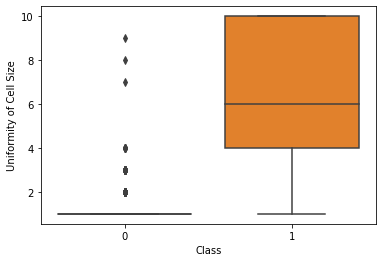

In [19]:
sns.boxplot(x ='Class', y = 'Uniformity of Cell Size', data = WBC)

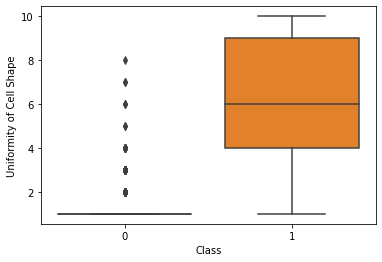

In [20]:
sns.boxplot(x ='Class', y = 'Uniformity of Cell Shape', data = WBC)

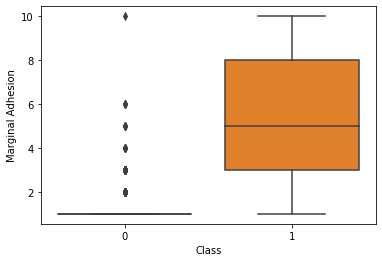

In [21]:
sns.boxplot(x ='Class', y = 'Marginal Adhesion', data = WBC)

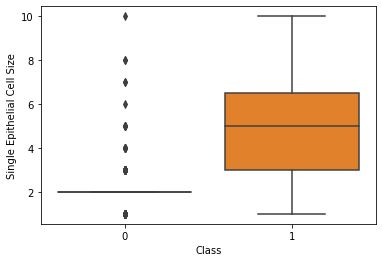

In [22]:
sns.boxplot(x ='Class', y = 'Single Epithelial Cell Size', data = WBC)

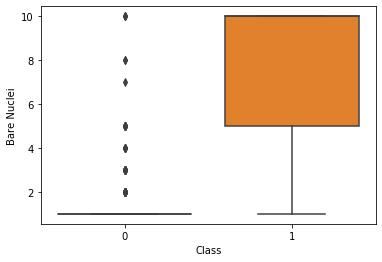

In [23]:
sns.boxplot(x ='Class', y = 'Bare Nuclei', data = WBC)

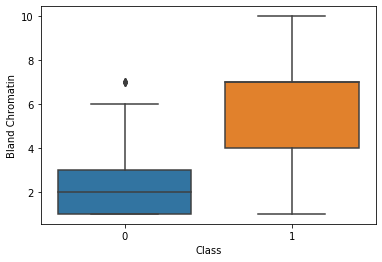

In [24]:
sns.boxplot(x ='Class', y = 'Bland Chromatin', data = WBC)

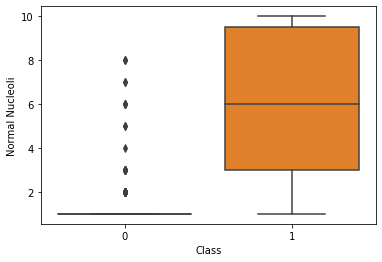

In [25]:
sns.boxplot(x ='Class', y = 'Normal Nucleoli', data = WBC)

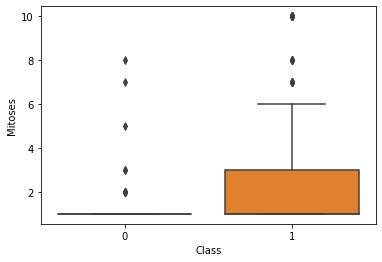

In [26]:
sns.boxplot(x ='Class', y = 'Mitoses', data = WBC)

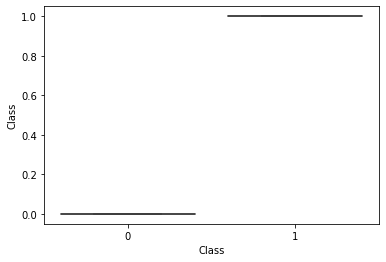

In [27]:
sns.boxplot(x ='Class', y = 'Class', data = WBC)

# Makes sense as the values are either 0 or 1

##### Looking at all the boxplots (except 'Class'), we can see that there are patterns between each variables on whether the cell are Benign or Malignant. To further test this, a pairplot and correlation is carried out determine which variable causes the most impact.

/Users/pryangkarao/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/pryangkarao/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


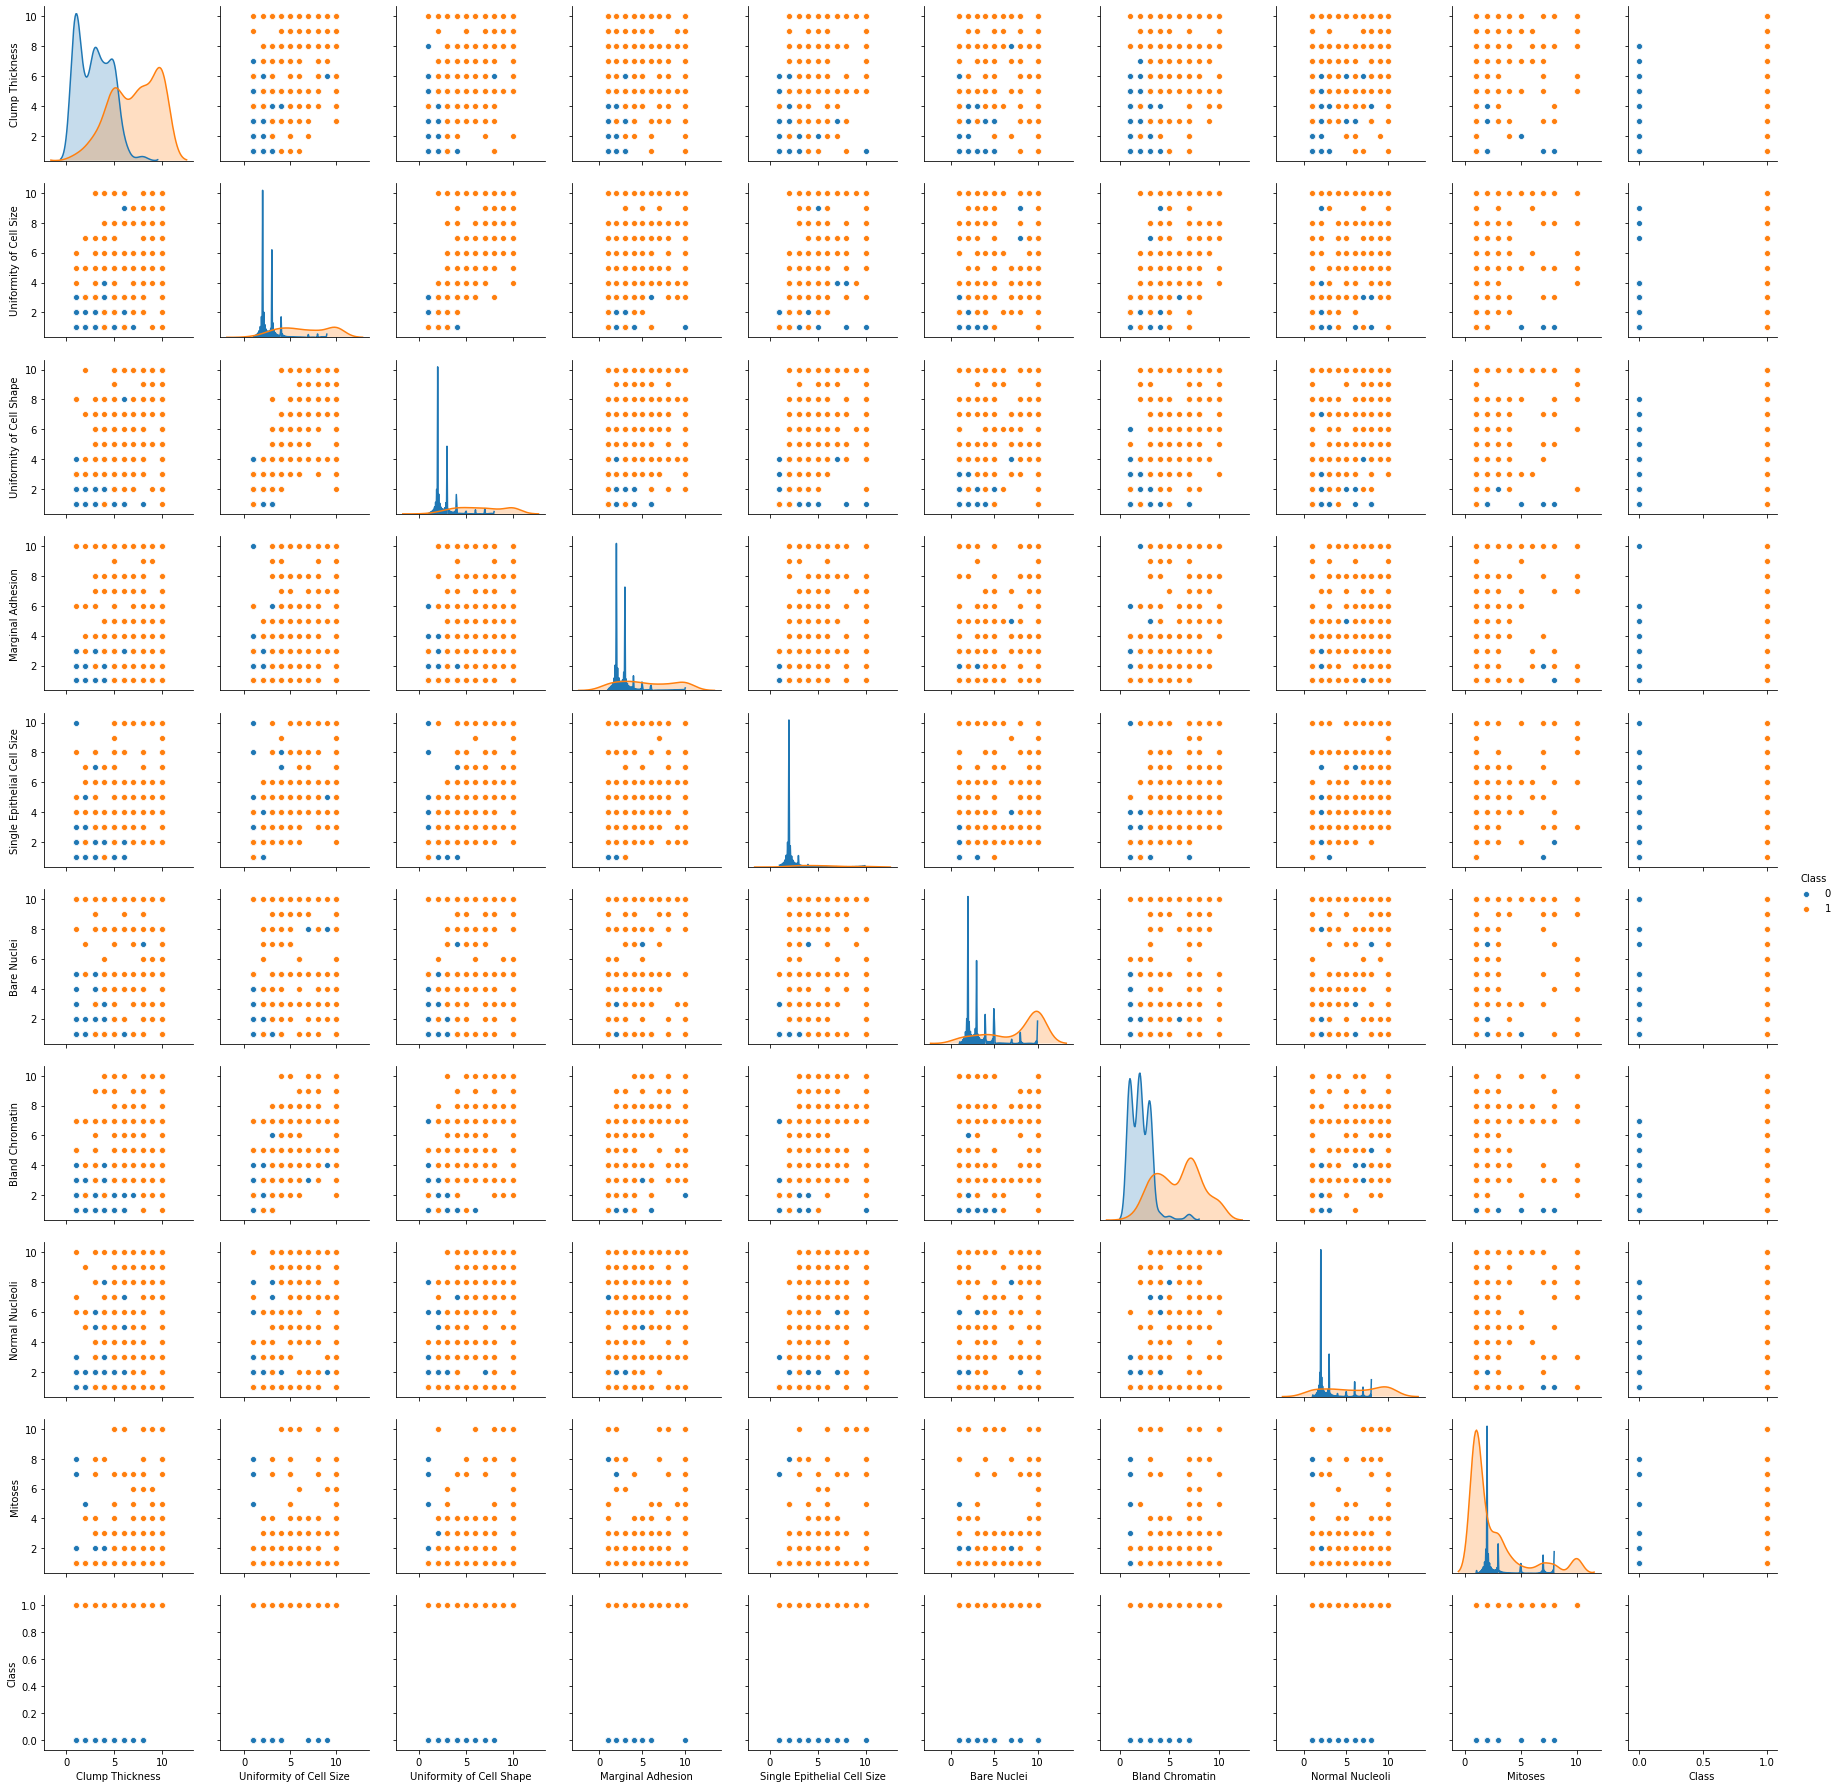

In [28]:
#To further visualize the dataset, a pairplot is done by separating the distinct 'Class' variable. 
sns.pairplot(WBC, hue="Class")
plt.show()

In [29]:
# It might be easier to determine correlations numerically. 

corr = WBC.corr()
corr.style.background_gradient(cmap='coolwarm')

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1,0.642481,0.65347,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.71479
Uniformity of Cell Size,0.642481,1,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
Uniformity of Cell Shape,0.65347,0.907228,1,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
Marginal Adhesion,0.487829,0.706977,0.685948,1,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
Single Epithelial Cell Size,0.523596,0.753544,0.722462,0.594548,1,0.585716,0.618128,0.628926,0.480583,0.690958
Bare Nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1,0.680615,0.58428,0.33921,0.822696
Bland Chromatin,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1,0.665602,0.346011,0.758228
Normal Nucleoli,0.534066,0.719346,0.717963,0.603121,0.628926,0.58428,0.665602,1,0.433757,0.718677
Mitoses,0.350957,0.460755,0.441258,0.418898,0.480583,0.33921,0.346011,0.433757,1,0.423448
Class,0.71479,0.820801,0.821891,0.706294,0.690958,0.822696,0.758228,0.718677,0.423448,1


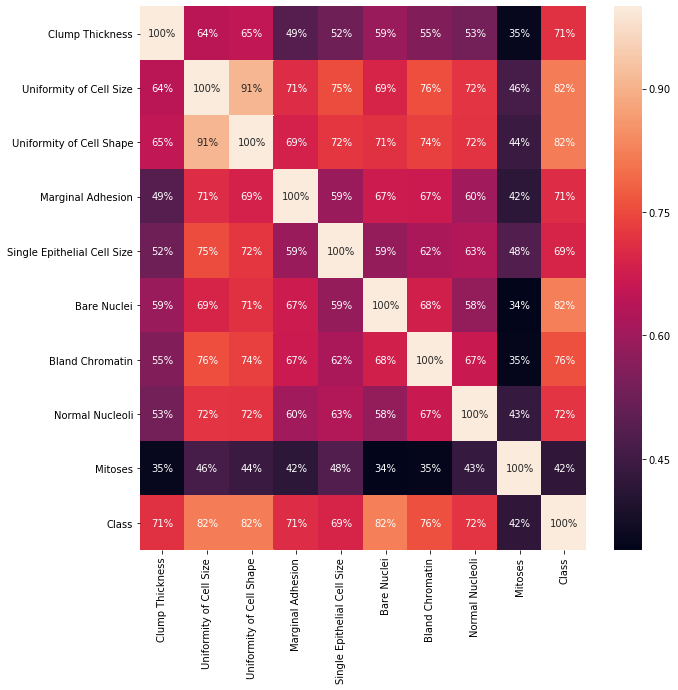

In [30]:
# To make it both visually pleasing and numerically understandable, a heatmap is created with the correlations in %
plt.figure(figsize = (10,10))
sns.heatmap(WBC.corr(), annot = True, fmt = '.0%')

##### Looking at the heatmaps, we can see the class correlation with other variables. Using the correlation and heatmap, the following feature importance is determined :-

    1) Bare Nuclei (82.23%)
    2) Uniformity of cell shape (82.19%)
    3) Uniformity of cell size (82.02%)
    4) Bland Chromatin (75.82%)
    5) Normal Nucleoli (71.87%)
    6) Clump Thickness (71.48%)
    7) Marginal Adhesion (70.63%)
    8) Single Epithelial Cell Size (69.10%)
    9) Mitoses (42.34%)

##### We can see there are strong correlations with the following order :-
    1) Uniformity of Cell Size and Uniformity of Cell Shape (91%)
    2) Bland Chromatin and Uniformity of Cell Size (76%)
    3) Uniformity of Cell Size and Single Epithelial Cell Size (75%)
---

In [31]:
#Separate dataset as response variable (independent variable) or feature variables.
#Do this t
X = WBC.drop('Class', axis = 1) #feature variable
y = WBC['Class']

In [32]:
#Train and Test data split using 80/20
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.2, random_state = 42)

In [33]:
#Count of how many rows are we testing on.
X_test.shape

(137, 9)

In [34]:
# Let look at the first 5 training data for the feature variables.
X_train.head (5)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
452,3,1,1,3,2,1,1,1,1
264,7,9,4,10,10,3,5,3,3
599,5,2,4,1,1,1,1,1,1
18,10,7,7,6,4,10,4,1,2
364,2,1,1,1,2,1,3,1,1


##### We can see that the data is random (as we used random_state). 

### Now that all the pre-processing is completed and the Train and Test set has been determined, we will step into the algorithms
---


# Feature Importance 

In [35]:
#A new dataframe is created with the the features (in this case all variables were selected).
#The scores are then determine to order the feature importance.
f_select = SelectKBest(chi2, k = 9)
X_new = f_select.fit_transform(X, y)
names = X.columns.values[f_select.get_support()]
scores = f_select.scores_[f_select.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Features', 'Scores'])

#https://stackoverflow.com/questions/39839112/the-easiest-way-for-getting-feature-names-after-running-selectkbest-in-scikit-le
#STEPS ATTAINED HERE

In [36]:
#A table to visualize the features sorted by the importance is then created
ns_df_sorted = ns_df.sort_values(['Scores', 'Features'], ascending = [False, True])
print(ns_df_sorted)

                      Features       Scores
5                  Bare Nuclei  1729.066174
1      Uniformity of Cell Size  1370.064587
2     Uniformity of Cell Shape  1279.767704
7              Normal Nucleoli  1143.866712
3            Marginal Adhesion   986.417879
6              Bland Chromatin   682.978239
0              Clump Thickness   624.135704
4  Single Epithelial Cell Size   497.536763
8                      Mitoses   228.994346


#### Looking at the feature importance obtained, there are differences in the order of feature importance with our initial list of obtained using the correlation and heatmap earlier. We will process using the Select K Best method.

## Random Forest Classifier

#### Random Forest is a form of supervised learning  and is ideal for medium sized data such as the WBC.
#### The RF also has a unique capability in feature selection which ranks the variables based on their importance. This is ideal for us as we are able to make a better model with more accurate results.


In [37]:
#The number of trees are set to 200 randomly
rfc = RandomForestClassifier(n_estimators = 200, random_state = 42)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [38]:
# This will show what the machine predicted; whether it is Benign or Malignant
pred_rfc[:20]

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1])

In [39]:
#Confusion matrix as prediction summary of the results
print(confusion_matrix(y_test, pred_rfc))

[[78  1]
 [ 5 53]]


In [40]:
# Model test. How well did it performed?
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        79
           1       0.98      0.91      0.95        58

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137



In [41]:
#Determine a more detailed accuracy score
rf_all = accuracy_score(y_test, pred_rfc)
print(rf_all)

0.9562043795620438


## SVM Classifier

#### This supervised algorithms works best with a binary classifications. It does better with smaller sample size.

In [42]:
# A future warning appeared when executing the code. Gamma was set to 'scale' as advised on 
# https://machinelearningmastery.com/how-to-fix-futurewarning-messages-in-scikit-learn/
clf = svm.SVC(gamma='scale')
clf.fit(X_train,y_train)
pred_clf = clf.predict(X_test)

In [43]:
#Confusion matrix as prediction summary of the results
print(confusion_matrix(y_test, pred_clf))

[[77  2]
 [ 5 53]]


In [44]:
# Model test. How well did it performed?
print(classification_report(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        79
           1       0.96      0.91      0.94        58

    accuracy                           0.95       137
   macro avg       0.95      0.94      0.95       137
weighted avg       0.95      0.95      0.95       137



In [45]:
#Determine a more detailed accuracy score
svm_all = accuracy_score(y_test, pred_clf)
print(svm_all)

0.948905109489051


## NAIVE BAYES

In [46]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred_gnb = gnb.predict(X_test)

In [47]:
#Confusion matrix as prediction summary of the results
print(confusion_matrix(y_test, pred_gnb))

[[76  3]
 [ 3 55]]


In [48]:
# Model test. How well did it performed?
print(classification_report(y_test, pred_gnb))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        79
           1       0.95      0.95      0.95        58

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137



In [49]:
#Determine a more detailed accuracy score
nb_all = accuracy_score(y_test, pred_gnb)
print(nb_all)

0.9562043795620438


## Decision Tree

In [50]:
tre = tree.DecisionTreeClassifier()
tre.fit(X_train, y_train)
pred_tre = tre.predict(X_test)

In [51]:
#Confusion matrix as prediction summary of the results
print(confusion_matrix(y_test, pred_tre))

[[77  2]
 [ 7 51]]


In [52]:
# Model test. How well did it performed?
print(classification_report(y_test, pred_tre))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        79
           1       0.96      0.88      0.92        58

    accuracy                           0.93       137
   macro avg       0.94      0.93      0.93       137
weighted avg       0.94      0.93      0.93       137



In [53]:
#Determine a more detailed accuracy score
dt_all = accuracy_score(y_test, pred_tre)
print(dt_all)

0.9343065693430657


[Text(591.48, 1026.8, 'X[1] <= 3.5\nentropy = 0.443\nsamples = 546\nvalue = [365, 181]'),
 Text(357.12, 906.0, 'X[5] <= 5.5\nentropy = 0.11\nsamples = 378\nvalue = [356, 22]'),
 Text(267.84000000000003, 785.2, 'X[7] <= 8.5\nentropy = 0.053\nsamples = 365\nvalue = [355, 10]'),
 Text(223.2, 664.4, 'X[5] <= 2.5\nentropy = 0.027\nsamples = 360\nvalue = [355, 5]'),
 Text(178.56, 543.6, 'entropy = 0.0\nsamples = 333\nvalue = [333, 0]'),
 Text(267.84000000000003, 543.6, 'X[0] <= 5.5\nentropy = 0.302\nsamples = 27\nvalue = [22, 5]'),
 Text(223.2, 422.79999999999995, 'X[7] <= 2.5\nentropy = 0.211\nsamples = 25\nvalue = [22, 3]'),
 Text(133.92000000000002, 302.0, 'X[4] <= 1.5\nentropy = 0.091\nsamples = 21\nvalue = [20, 1]'),
 Text(89.28, 181.19999999999993, 'X[6] <= 1.5\nentropy = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(44.64, 60.399999999999864, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(133.92000000000002, 60.399999999999864, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(17

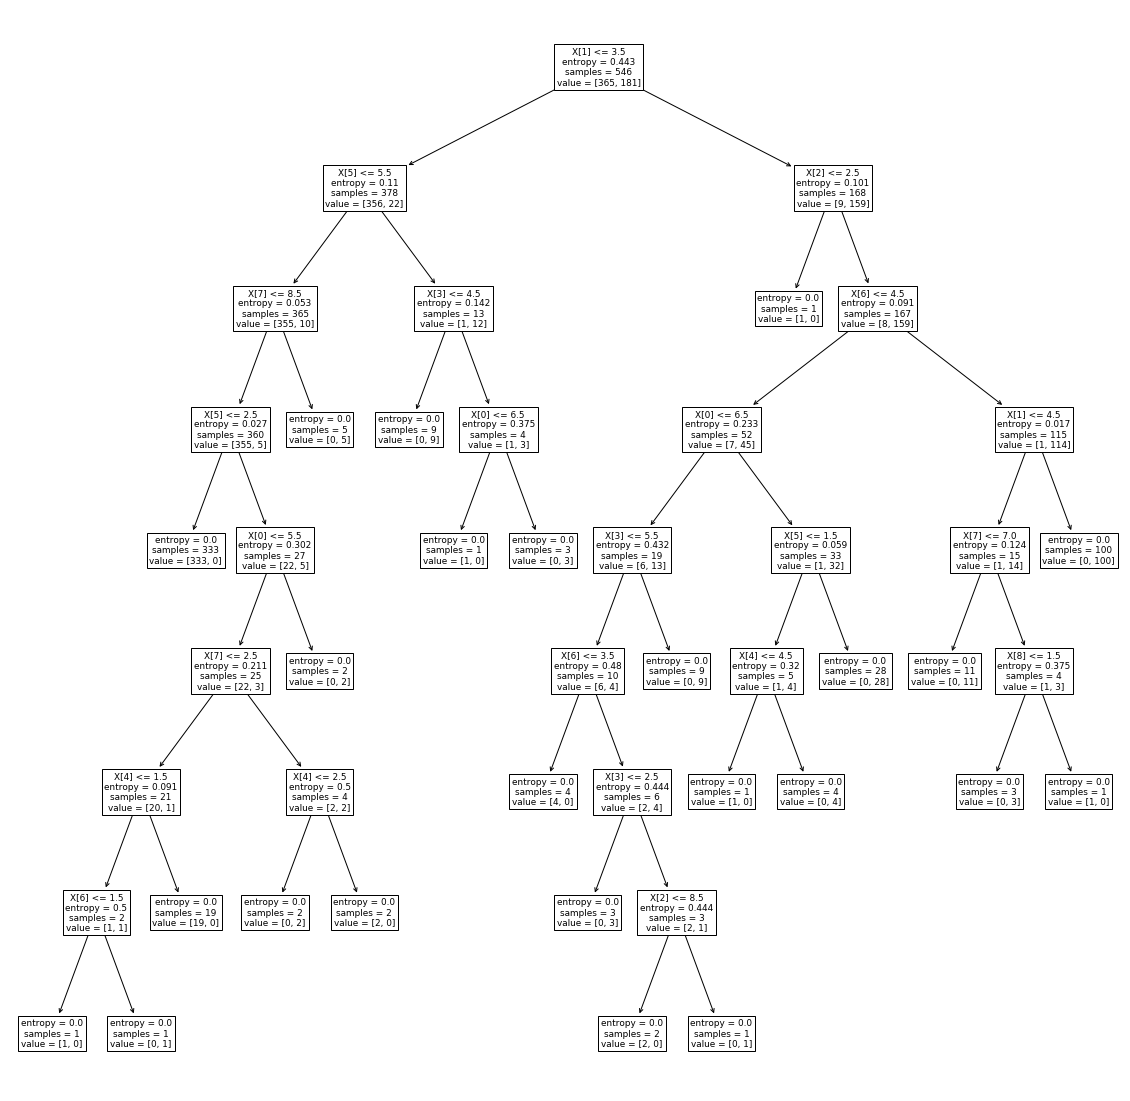

In [54]:
fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(tre.fit(X_train, y_train))

## KNN

In [55]:
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
pred_neigh = neigh.predict(X_test)

In [56]:
#Confusion matrix as prediction summary of the results
print(confusion_matrix(y_test, pred_neigh))

[[78  1]
 [ 6 52]]


In [57]:
# Model test. How well did it performed?
print(classification_report(y_test, pred_neigh))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        79
           1       0.98      0.90      0.94        58

    accuracy                           0.95       137
   macro avg       0.95      0.94      0.95       137
weighted avg       0.95      0.95      0.95       137



In [58]:
#Determine a more detailed accuracy score
knn_all = accuracy_score(y_test, pred_neigh)
print(knn_all)

0.948905109489051


# Models with Feature Selections

### From here on, we will be testing all models by Backward Elimination which is the removal of the lowest importance features.

#### Based on the rankings obtained, the features will be removed in the following order:-
    1) Mitoses
    2) Single Epithelial Cell Size
    3) Clump Thickness
    4) Bland Chromatin
    5) Marginal Adhesion
    6) Normal Nucleoli
    7) Uniformity of Cell Shape
    8) Uniformity of Cell Size
    
#### The final step will only have Bare Nuclei (the calculated most important feature) to determine the cancer type.

In [59]:
# Start removing the features in order of lowest importance (Mitoses) to highest (Uniformity of Cell Size).
# The final dataframe will only have Bare Nuclei.
#The y remains the same as it is the Class variable.

X_1 = X.drop('Mitoses', axis = 1) #feature variable
X_2 = X_1.drop('Single Epithelial Cell Size', axis = 1)
X_3 = X_2.drop('Clump Thickness', axis = 1)
X_4 = X_3.drop('Bland Chromatin', axis = 1)
X_5 = X_4.drop('Marginal Adhesion', axis = 1)
X_6 = X_5.drop('Normal Nucleoli', axis = 1)
X_7 = X_6.drop('Uniformity of Cell Shape', axis = 1)
X_8 = X_7.drop('Uniformity of Cell Size', axis = 1)


In [60]:
#Retrain all the datasets with the Train and Test data split with 80/20 
X_train_1, X_test_1, y_train, y_test = train_test_split (X_1,y, test_size = 0.2, random_state = 42)
X_train_2, X_test_2, y_train, y_test = train_test_split (X_2,y, test_size = 0.2, random_state = 42)
X_train_3, X_test_3, y_train, y_test = train_test_split (X_3,y, test_size = 0.2, random_state = 42)
X_train_4, X_test_4, y_train, y_test = train_test_split (X_4,y, test_size = 0.2, random_state = 42)
X_train_5, X_test_5, y_train, y_test = train_test_split (X_5,y, test_size = 0.2, random_state = 42)
X_train_6, X_test_6, y_train, y_test = train_test_split (X_6,y, test_size = 0.2, random_state = 42)
X_train_7, X_test_7, y_train, y_test = train_test_split (X_7,y, test_size = 0.2, random_state = 42)
X_train_8, X_test_8, y_train, y_test = train_test_split (X_8,y, test_size = 0.2, random_state = 42)

In [61]:
#Confirm that there is only one variable (Bare Nuclei) at the end.
X_test_8.shape

(137, 1)

## Random Forest with Backward Elimination
#### We will repeat the entire step with Random Forest to see check on the performance of the model as we remove the variables.

In [62]:
#The number of trees are set to 200 randomly
#rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train_1, y_train)
pred_rfc_1 = rfc.predict(X_test_1)

In [63]:
#Confusion matrix as prediction summary of the results
print(confusion_matrix(y_test, pred_rfc_1))

[[78  1]
 [ 4 54]]


In [64]:
# Model test. How well did it performed?
print(classification_report(y_test, pred_rfc_1))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        79
           1       0.98      0.93      0.96        58

    accuracy                           0.96       137
   macro avg       0.97      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137



In [65]:
#Determine a more detailed accuracy score (m1 as minus 1 feature)
rf_m1 = accuracy_score(y_test, pred_rfc_1)

In [66]:
#Repeat the steps with all the new dataset from X_2 till X_8. We will focus solely on the accuracy score from here.
rfc.fit(X_train_2, y_train)
pred_rfc_2 = rfc.predict(X_test_2)
rf_m2 = accuracy_score(y_test, pred_rfc_2)


In [67]:
rfc.fit(X_train_3, y_train)
pred_rfc_3 = rfc.predict(X_test_3)
rf_m3 = accuracy_score(y_test, pred_rfc_3)

In [68]:
rfc.fit(X_train_4, y_train)
pred_rfc_4 = rfc.predict(X_test_4)
rf_m4 = accuracy_score(y_test, pred_rfc_4)

In [69]:
rfc.fit(X_train_5, y_train)
pred_rfc_5 = rfc.predict(X_test_5)
rf_m5 = accuracy_score(y_test, pred_rfc_5)

In [70]:
rfc.fit(X_train_6, y_train)
pred_rfc_6 = rfc.predict(X_test_6)
rf_m6 = accuracy_score(y_test, pred_rfc_6)

In [71]:
rfc.fit(X_train_7, y_train)
pred_rfc_7 = rfc.predict(X_test_7)
rf_m7 = accuracy_score(y_test, pred_rfc_7)

In [72]:
rfc.fit(X_train_8, y_train)
pred_rfc_8 = rfc.predict(X_test_8)
rf_m8 = accuracy_score(y_test, pred_rfc_8)

## SVM with Backward Elimination

In [73]:
clf.fit(X_train_1,y_train)
pred_clf_1 = clf.predict(X_test_1)
svm_m1 = accuracy_score(y_test, pred_clf_1)

In [74]:
clf.fit(X_train_2,y_train)
pred_clf_2 = clf.predict(X_test_2)
svm_m2 = accuracy_score(y_test, pred_clf_2)

In [75]:
clf.fit(X_train_3,y_train)
pred_clf_3 = clf.predict(X_test_3)
svm_m3 = accuracy_score(y_test, pred_clf_3)

In [76]:
clf.fit(X_train_4,y_train)
pred_clf_4 = clf.predict(X_test_4)
svm_m4 = accuracy_score(y_test, pred_clf_4)

In [77]:
clf.fit(X_train_5,y_train)
pred_clf_5 = clf.predict(X_test_5)
svm_m5 = accuracy_score(y_test, pred_clf_5)

In [78]:
clf.fit(X_train_6,y_train)
pred_clf_6 = clf.predict(X_test_6)
svm_m6 = accuracy_score(y_test, pred_clf_6)

In [79]:
clf.fit(X_train_7,y_train)
pred_clf_7 = clf.predict(X_test_7)
svm_m7 = accuracy_score(y_test, pred_clf_7)

In [80]:
clf.fit(X_train_8,y_train)
pred_clf_8 = clf.predict(X_test_8)
svm_m8 = accuracy_score(y_test, pred_clf_8)

## Naive Bayes with Backward Elimination

In [81]:
#gnb = GaussianNB()
gnb.fit(X_train_1, y_train)
pred_gnb_1 = gnb.predict(X_test_1)
nb_m1 = accuracy_score(y_test, pred_gnb_1)

In [82]:
gnb.fit(X_train_2, y_train)
pred_gnb_2 = gnb.predict(X_test_2)
nb_m2 = accuracy_score(y_test, pred_gnb_2)

In [83]:
gnb.fit(X_train_3, y_train)
pred_gnb_3 = gnb.predict(X_test_3)
nb_m3 = accuracy_score(y_test, pred_gnb_3)

In [84]:
gnb.fit(X_train_4, y_train)
pred_gnb_4 = gnb.predict(X_test_4)
nb_m4 = accuracy_score(y_test, pred_gnb_4)

In [85]:
gnb.fit(X_train_5, y_train)
pred_gnb_5 = gnb.predict(X_test_5)
nb_m5 = accuracy_score(y_test, pred_gnb_5)

In [86]:
gnb.fit(X_train_6, y_train)
pred_gnb_6 = gnb.predict(X_test_6)
nb_m6 = accuracy_score(y_test, pred_gnb_6)

In [87]:
gnb.fit(X_train_7, y_train)
pred_gnb_7 = gnb.predict(X_test_7)
nb_m7 = accuracy_score(y_test, pred_gnb_7)

In [88]:
gnb.fit(X_train_8, y_train)
pred_gnb_8 = gnb.predict(X_test_8)
nb_m8 = accuracy_score(y_test, pred_gnb_8)

## Decision Tree with Backward Elimination

In [89]:
#tre = tree.DecisionTreeClassifier()
tre.fit(X_train_1, y_train)
pred_tre_1 = tre.predict(X_test_1)
dt_m1 = accuracy_score(y_test, pred_tre_1)

In [90]:
tre.fit(X_train_2, y_train)
pred_tre_2 = tre.predict(X_test_2)
dt_m2 = accuracy_score(y_test, pred_tre_2)

In [91]:
tre.fit(X_train_3, y_train)
pred_tre_3 = tre.predict(X_test_3)
dt_m3 = accuracy_score(y_test, pred_tre_3)

In [92]:
tre.fit(X_train_4, y_train)
pred_tre_4 = tre.predict(X_test_4)
dt_m4 = accuracy_score(y_test, pred_tre_4)

In [93]:
tre.fit(X_train_5, y_train)
pred_tre_5 = tre.predict(X_test_5)
dt_m5 = accuracy_score(y_test, pred_tre_5)

In [94]:
tre.fit(X_train_6, y_train)
pred_tre_6 = tre.predict(X_test_6)
dt_m6 = accuracy_score(y_test, pred_tre_6)

In [95]:
tre.fit(X_train_7, y_train)
pred_tre_7 = tre.predict(X_test_7)
dt_m7 = accuracy_score(y_test, pred_tre_7)

In [96]:
tre.fit(X_train_8, y_train)
pred_tre_8 = tre.predict(X_test_8)
dt_m8 = accuracy_score(y_test, pred_tre_8)

[Text(401.0625, 996.6, 'X[0] <= 3.5\nentropy = 0.443\nsamples = 546\nvalue = [365, 181]'),
 Text(139.5, 815.4000000000001, 'X[0] <= 1.5\nentropy = 0.134\nsamples = 373\nvalue = [346, 27]'),
 Text(69.75, 634.2, 'entropy = 0.07\nsamples = 332\nvalue = [320, 12]'),
 Text(209.25, 634.2, 'X[0] <= 2.5\nentropy = 0.464\nsamples = 41\nvalue = [26, 15]'),
 Text(139.5, 453.0, 'entropy = 0.408\nsamples = 21\nvalue = [15, 6]'),
 Text(279.0, 453.0, 'entropy = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(662.625, 815.4000000000001, 'X[0] <= 5.5\nentropy = 0.196\nsamples = 173\nvalue = [19, 154]'),
 Text(488.25, 634.2, 'X[0] <= 4.5\nentropy = 0.465\nsamples = 38\nvalue = [14, 24]'),
 Text(418.5, 453.0, 'entropy = 0.473\nsamples = 13\nvalue = [5, 8]'),
 Text(558.0, 453.0, 'entropy = 0.461\nsamples = 25\nvalue = [9, 16]'),
 Text(837.0, 634.2, 'X[0] <= 8.5\nentropy = 0.071\nsamples = 135\nvalue = [5, 130]'),
 Text(697.5, 453.0, 'X[0] <= 6.5\nentropy = 0.211\nsamples = 25\nvalue = [3, 22]'),
 Text(627.7

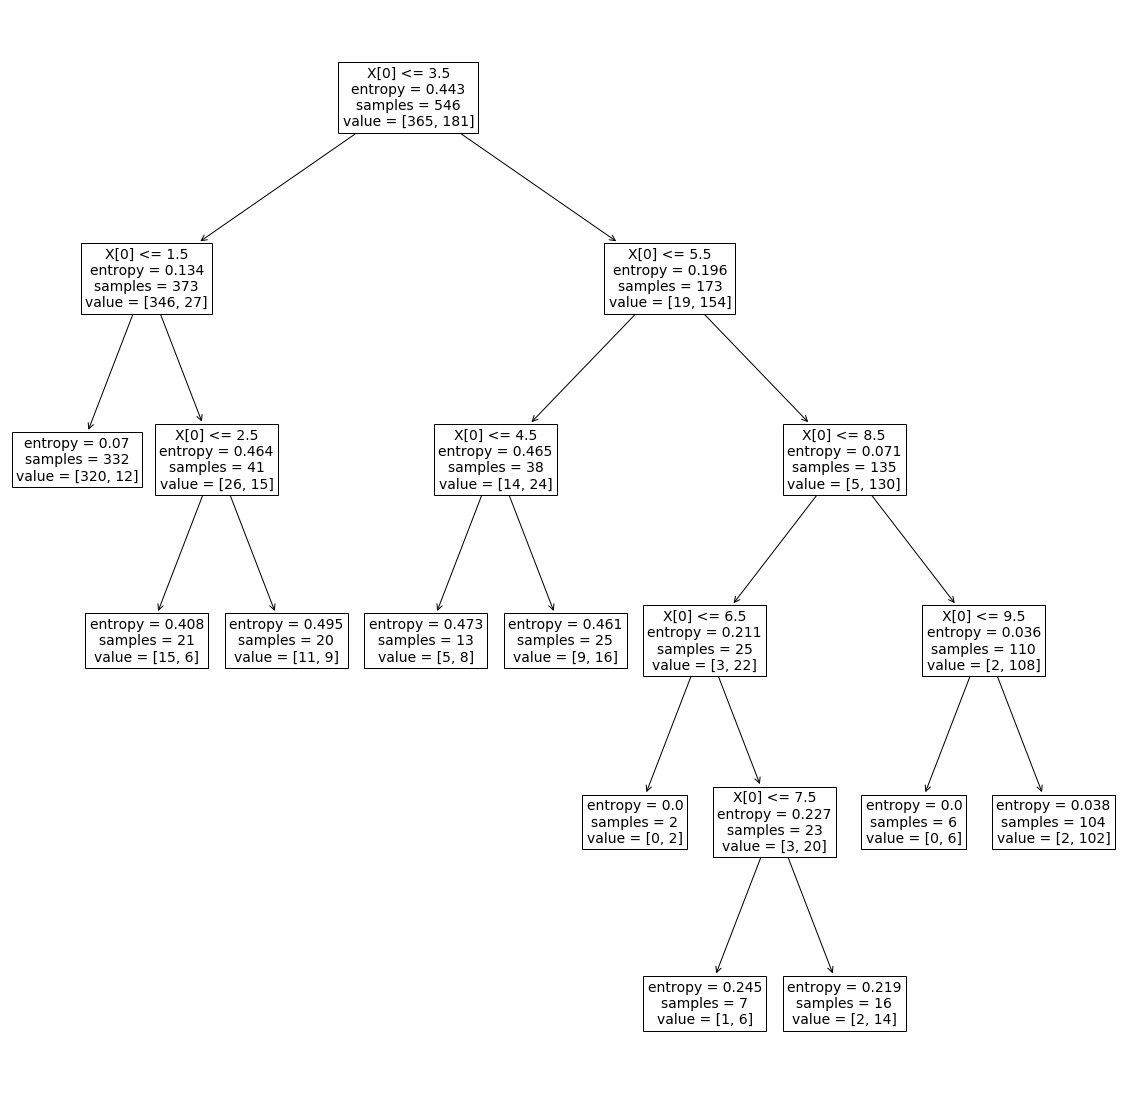

In [97]:
fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(tre.fit(X_train_8, y_train))

In [98]:
X_train_8.shape

(546, 1)

## KNN with Backward Elimination

In [99]:
#neigh = KNeighborsClassifier()
neigh.fit(X_train_1, y_train)
pred_neigh_1 = neigh.predict(X_test_1)
knn_m1 = accuracy_score(y_test, pred_neigh_1)

In [100]:
neigh.fit(X_train_2, y_train)
pred_neigh_2 = neigh.predict(X_test_2)
knn_m2 = accuracy_score(y_test, pred_neigh_2)

In [101]:
neigh.fit(X_train_3, y_train)
pred_neigh_3 = neigh.predict(X_test_3)
knn_m3 = accuracy_score(y_test, pred_neigh_3)

In [102]:
neigh.fit(X_train_4, y_train)
pred_neigh_4 = neigh.predict(X_test_4)
knn_m4 = accuracy_score(y_test, pred_neigh_4)

In [103]:
neigh.fit(X_train_5, y_train)
pred_neigh_5 = neigh.predict(X_test_5)
knn_m5 = accuracy_score(y_test, pred_neigh_5)

In [104]:
neigh.fit(X_train_6, y_train)
pred_neigh_6 = neigh.predict(X_test_6)
knn_m6 = accuracy_score(y_test, pred_neigh_6)

In [105]:
neigh.fit(X_train_7, y_train)
pred_neigh_7 = neigh.predict(X_test_7)
knn_m7 = accuracy_score(y_test, pred_neigh_7)

In [106]:
neigh.fit(X_train_8, y_train)
pred_neigh_8 = neigh.predict(X_test_8)
knn_m8 = accuracy_score(y_test, pred_neigh_8)

## Now we will compare all the values and plots a graph to visualize the accuracy of the models with varying variables.

    



In [107]:
Comparison_Table_Collective = { 
    'Variables': ['All Features','Features -1','Features -2','Features -3', 'Features -4','Features -5','Features -6','Features -7', 'Features -8'],
    'Random Forest': [rf_all,rf_m1,rf_m2,rf_m3,rf_m4,rf_m5,rf_m6,rf_m7,rf_m8],
    'SVM': [svm_all,svm_m1,svm_m2,svm_m3,svm_m4,svm_m5,svm_m6,svm_m7,svm_m8],
    'Naive Bayes': [nb_all,nb_m1,nb_m2,nb_m3,nb_m4,nb_m5,nb_m6,nb_m7,nb_m8],
    'Decision Tree':[dt_all,dt_m1,dt_m2,dt_m3,dt_m4,dt_m5,dt_m6,dt_m7,dt_m8],
    'KNN':[knn_all,knn_m1,knn_m2,knn_m3,knn_m4,knn_m5,knn_m6,knn_m7,knn_m8]
}
Comparison_Table = pd.DataFrame(Comparison_Table_Collective)  
Comparison_Table

,Variables,Random Forest,SVM,Naive Bayes,Decision Tree,KNN
0,All Features,0.956204,0.948905,0.956204,0.934307,0.948905
1,Features -1,0.963504,0.956204,0.970803,0.927007,0.956204
2,Features -2,0.963504,0.956204,0.963504,0.934307,0.948905
3,Features -3,0.934307,0.934307,0.948905,0.927007,0.941606
4,Features -4,0.934307,0.934307,0.948905,0.934307,0.941606
5,Features -5,0.934307,0.934307,0.941606,0.927007,0.948905
6,Features -6,0.941606,0.927007,0.934307,0.905109,0.934307
7,Features -7,0.948905,0.927007,0.927007,0.948905,0.941606
8,Features -8,0.897810,0.897810,0.897810,0.897810,0.824818


In [108]:
#Highlight the best accuracy for each model.

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: pink' if v else '' for v in is_max]

Comparison_Table.style.apply(highlight_max,subset=pd.IndexSlice[:, ['Random Forest', 'SVM', 'Naive Bayes', 'Decision Tree','KNN']])


,Variables,Random Forest,SVM,Naive Bayes,Decision Tree,KNN
0,All Features,0.956204,0.948905,0.956204,0.934307,0.948905
1,Features -1,0.963504,0.956204,0.970803,0.927007,0.956204
2,Features -2,0.963504,0.956204,0.963504,0.934307,0.948905
3,Features -3,0.934307,0.934307,0.948905,0.927007,0.941606
4,Features -4,0.934307,0.934307,0.948905,0.934307,0.941606
5,Features -5,0.934307,0.934307,0.941606,0.927007,0.948905
6,Features -6,0.941606,0.927007,0.934307,0.905109,0.934307
7,Features -7,0.948905,0.927007,0.927007,0.948905,0.941606
8,Features -8,0.89781,0.89781,0.89781,0.89781,0.824818


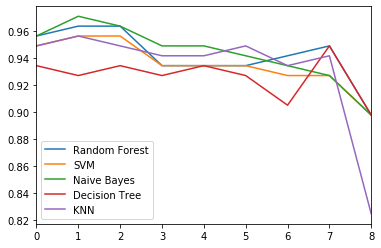

In [109]:
Comparison_Table.plot()